In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# if idx % shrinkWrapSubIter == 0 and idx > 0 and sigma/dt > 3:
#     #--> z = conv (G, x - beta * y)
#     Gaussian = G(sigma)
#     Gaussian = cupy.array( Gaussian/Gaussian.max() )

#     z = cupy.fft.ifftn( cupy.fft.fftshift(Gaussian) * cupy.fft.fftn(x) )

#     dsupport = cupy.abs( x ) > ( threshold/100. ) * cupy.abs( x ).max()
#     csupport = 1 - dsupport

#     sigma = sigma / 2.0

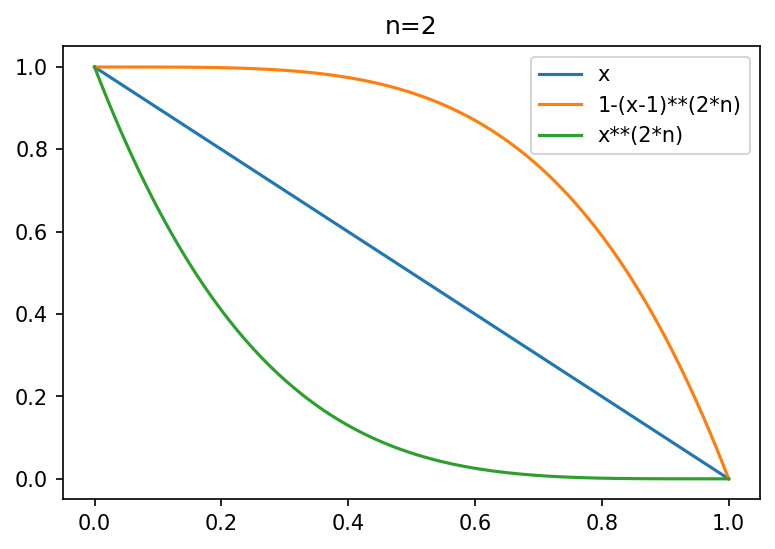

In [3]:
def create_filter_values(initial_sigma,npoints,curvature=2, method='positive_curvature'):

    x = np.linspace(0,1,npoints)
    f1 = x
    f2 = 1-(x-1)**(2*curvature)
    f3 = x**(2*curvature)
    
    f1 = f1[::-1]
    f2 = f2[::-1]
    f3 = f3[::-1]

    fig, ax = plt.subplots(dpi=150)
    ax.plot(x,f1,label='x')
    ax.plot(x,f2,label='1-(x-1)**(2*n)')
    ax.plot(x,f3,label='x**(2*n)')
    ax.legend()
    ax.set_title(f'n={curvature}')

    if method == 'linear':
        return f1
    if method == 'negative_curvature':
        return f2
    elif method == 'positive_curvature':
        return f3

# smooth_width = a * exp(-cdi.cycle/b*log(b/a))

f1 = create_filter_values(1,npoints=100,curvature=2)

In [4]:
from scipy import ndimage

def shrinkwrap(img,sigma,threshold=0,sigma_method='linear', threshold_method='max'):
    
    def gaussian_filter(img,sigma,mean=0):
        return ndimage.gaussian_filter(img, sigma)

    def sigma_value_update(sigma):
        return sigma

    def apply_threshold(image,threshold,method):

        if method == 'max':
            image = np.where(image>threshold*np.max(image),image,0) 
        elif method == 'mean':
            image = np.where(image>threshold*np.mean(image),image,0) 
        elif method == 'rms':
            image = np.where(image>threshold*np.rms(image),image,0) 

        return image
    
    #TODOs:
    # - force shrinking
    # - limit number of pixels at the border to be updated
    # - set minimum fraction of pixels that support can have
    # - use range of sigma values instead of sequence from an initial value
    
    img = gaussian_filter(img,sigma) # gaussian filter with standard deviation = sigma
    
    img = apply_threshold(img,threshold, threshold_method)
    
    # new_sigma = sigma_value_update(sigma,sigma_method)
    
    return im


from skimage import data

img1 = getattr(data, 'camera')()
print(img1.shape)
img2 = shrinkwrap(img1,10,0)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img1)
ax[1].imshow(img2)

(512, 512)


NameError: name 'im' is not defined

In [29]:
def get_word_image(text='MyText'):

    from matplotlib.backends.backend_agg import FigureCanvas

    fig = plt.Figure(figsize=(5.12, 5.12))
    canvas = FigureCanvas(fig)
    ax = fig.subplots()
    t = ax.text(0.5, 0.5, text, fontsize=100, fontweight='heavy', ha='center', va='center')
    # ax.axis('off')
    # canvas.draw()
    
    a = 1- np.array(canvas.renderer.buffer_rgba())[:, :, 0]/255
    plt.figure()
    plt.imshow(a)
    
    return a
a = get_word_image()

AttributeError: 'FigureCanvasAgg' object has no attribute 'renderer'

(512, 512)

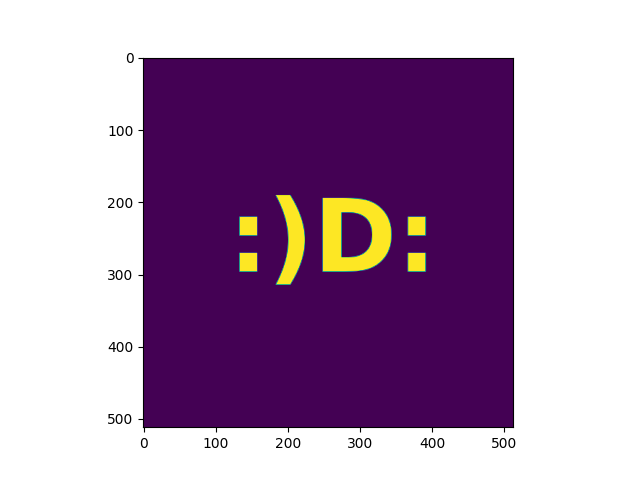

In [21]:

a.shape